 ![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

# Segmentación de clientes - Parte 1

Step 1.- Definimos nuestro problema y Objetivo:
* Problema : Las estrategias de marketing y ventas genéricas pueden no ser efectivas para todos los clientes.
* Objetivo : Segmentación de clientes como herramienta para personalizar el servicio hacia los clientes


Step 2.- Datos
* Usaremos datos sobre clientes de un centro comercial

In [1]:
# Importamos las librerias necesarias
import pandas as pd # Manipulación de datos
import numpy as np # Manipulación de datos
import matplotlib.pyplot as plt # visualizacion
import seaborn as sns # visualización
from sklearn.cluster import KMeans # Agrupamiento

Cargamos nuestros datos

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/germaingarcia/Files_Lectures/main/Mall_Customers.csv')
# mostramos instancias de ejemplo
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Describimos nuestro dataset (Campos)
* CustomerID: Un identificador único para cada cliente.
* Gender: El género del cliente (Masculino o Femenino).
* Age: La edad del cliente.
* Annual Income (k$): El ingreso anual del cliente en miles de dólares.
* Spending Score (1-100): Una puntuación asignada por el centro comercial en función del comportamiento del cliente y la cantidad que gasta. Cuanto mayor sea la puntuación, mayor es el gasto del cliente.

Número de Instancias
* 200

In [3]:
data.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

Preprocesamos nuestros datos
* Eliminar instancias con datos faltantes

In [3]:
data.dropna(inplace=True)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Step 3: Analisis Exploratorio de Datos

Comenzamos con el calculo de valores estadisticos de nuestros datos en función de sus campos o features

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Ahora pasamos a ver las relaciones entre los diferentes campos (features) de nuestro dataset.

/home/fascue/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fascue/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/fascue/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/fascue/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fut

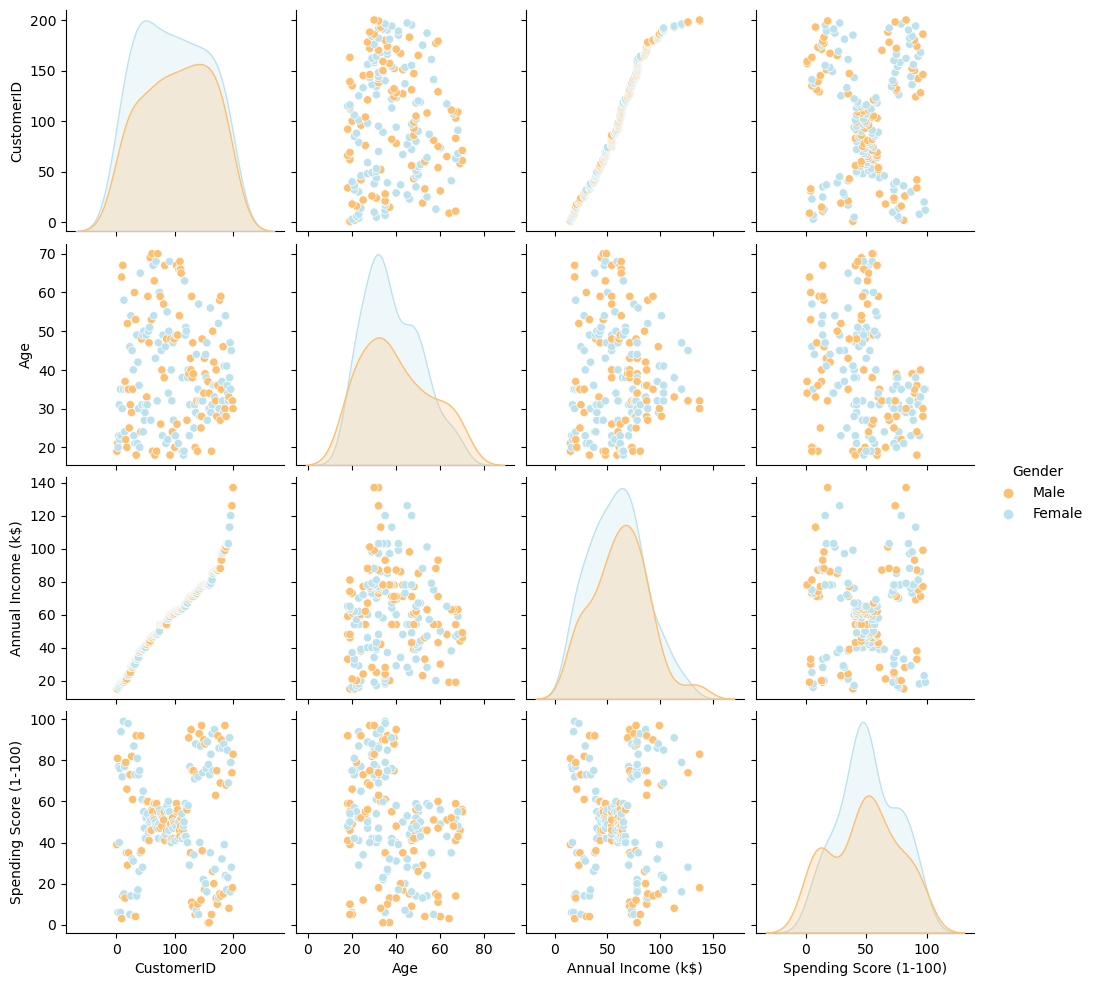

In [5]:
# graficamos la relación entre los diferentes campos en función del campo género
sns.pairplot(data=data,hue ='Gender',palette='RdYlBu')

De los gráficos podemos ver:
* La diagonal principal compara cada campo consigo mismo (muestra la distribución de valores - frecuencia de clientes en función del género de los mismos)
* Los gráficos restantes comparan dos campos de nuestro dataset llevando en consideración el género


En esta etapa podemos centrarnos en comparar campos especificos

* Ingreso Anual vs Puntuación (score) de Gasto

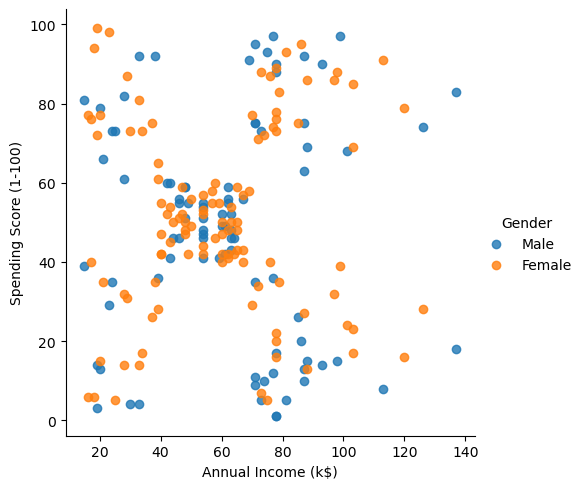

In [6]:
# Anual Income vs Spending Score
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data,
           hue='Gender', fit_reg=False)

* Edad vs Puntuación de gasto

Text(0.5, 0.98, 'Age vs Spending Score')

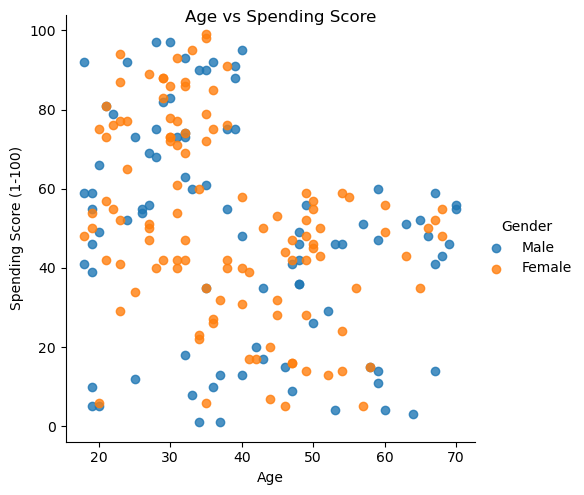

In [7]:
# Age vs Spending Score
sns.lmplot(x='Age',y='Spending Score (1-100)',data=data, hue='Gender',fit_reg=False)
plt.suptitle('Age vs Spending Score')

Al centrarnos en comparaciones especificas, podemos encontrar visualmente:
 * grupos de usuarios con mismas características
 * outliers
 * etc

Tambien podemos visulizar la frecuencia de clientes en relación a campos especificos

* Frecuencia de clientes según su puntuación de gasto y género

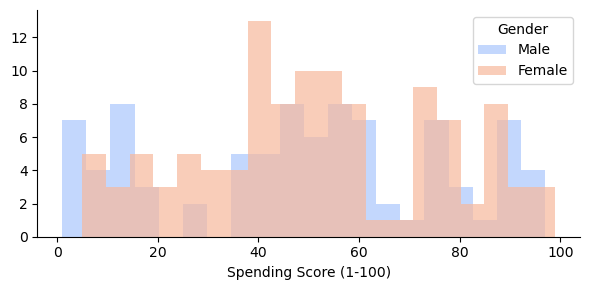

In [8]:
g= sns.FacetGrid(data, hue='Gender',palette='coolwarm',aspect=2,legend_out=False)
g= g.map(plt.hist,'Spending Score (1-100)',bins=20,alpha=0.7)
g.add_legend()

* Frecuencia de clientes según su ingreso anual y género

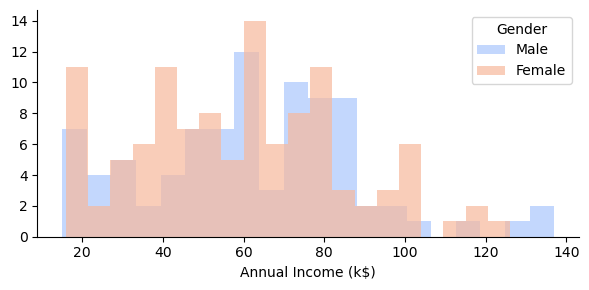

In [9]:
g= sns.FacetGrid(data, hue='Gender',palette='coolwarm', aspect=2,legend_out=False)
g= g.map(plt.hist,'Annual Income (k$)',bins=20,alpha=0.7)
g.add_legend()

Step 4: Modelamiento
 * Segmentación (agrupamiento)

Para realizar el agrupamiento:
* Podemos definir arbitrariamente (EDA) el número de grupos deseados
* Encontrar automaticamente el número de grupos óptimo (el más adecuado y útil para nuestro objetivo

In [11]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
# Campos: Anual Income y Spending Score
# usaremos Elbow Method para encontrar el número de grupos
X= data.iloc[:, [3,4]].values



---



In [11]:
X= data.iloc[:, 1:].values

In [12]:
#para eso vamos a usar 2 clases
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# creamos un objeto de ColumnTransformer class
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough') #pasamos que tipo de transformación queremos hacer y que columnas se verán afectadas
# passthrough es para no codificar las columnas que no fueron especificadas
# si no especificamos "passthrough" dejará de lado las demás columnas eliminando del resultado
X = ct.fit_transform(X)

In [13]:
X

array([[0.0, 1.0, 19, 15, 39],
       [0.0, 1.0, 21, 15, 81],
       [1.0, 0.0, 20, 16, 6],
       [1.0, 0.0, 23, 16, 77],
       [1.0, 0.0, 31, 17, 40],
       [1.0, 0.0, 22, 17, 76],
       [1.0, 0.0, 35, 18, 6],
       [1.0, 0.0, 23, 18, 94],
       [0.0, 1.0, 64, 19, 3],
       [1.0, 0.0, 30, 19, 72],
       [0.0, 1.0, 67, 19, 14],
       [1.0, 0.0, 35, 19, 99],
       [1.0, 0.0, 58, 20, 15],
       [1.0, 0.0, 24, 20, 77],
       [0.0, 1.0, 37, 20, 13],
       [0.0, 1.0, 22, 20, 79],
       [1.0, 0.0, 35, 21, 35],
       [0.0, 1.0, 20, 21, 66],
       [0.0, 1.0, 52, 23, 29],
       [1.0, 0.0, 35, 23, 98],
       [0.0, 1.0, 35, 24, 35],
       [0.0, 1.0, 25, 24, 73],
       [1.0, 0.0, 46, 25, 5],
       [0.0, 1.0, 31, 25, 73],
       [1.0, 0.0, 54, 28, 14],
       [0.0, 1.0, 29, 28, 82],
       [1.0, 0.0, 45, 28, 32],
       [0.0, 1.0, 35, 28, 61],
       [1.0, 0.0, 40, 29, 31],
       [1.0, 0.0, 23, 29, 87],
       [0.0, 1.0, 60, 30, 4],
       [1.0, 0.0, 21, 30, 73],
       [0.0, 

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X[:,2:])
X[:,2:] = sc.transform(X[:,2:])

In [15]:
# realizamos iterativamente agrupamiento calculando el valor Inertia
Inertia=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    Inertia.append(kmeans.inertia_)

/home/fascue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fascue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fascue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fascue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

El valor de 'Inertia' nos ayudará a decidir que número de grupos es mejor en comparación a otros

* Visualizamos el valor de Inertia segun en función del número de grupos k

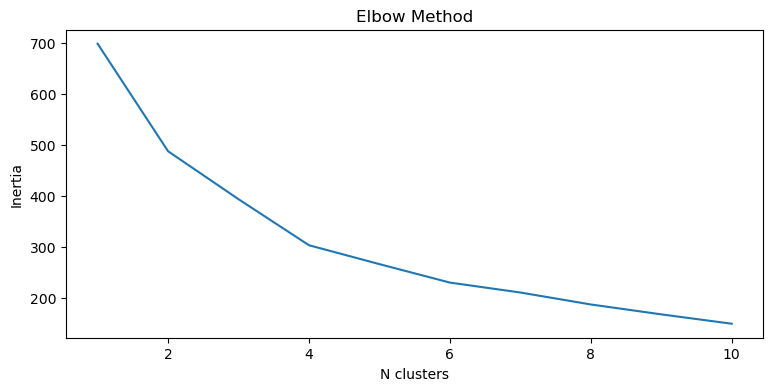

In [16]:
#Visualización del Elbow Method
plt.figure(1 , figsize = (9 ,4))
plt.plot(range(1,11), Inertia,'-')
plt.title('Elbow Method')
plt.xlabel('N clusters')
plt.ylabel('Inertia')
plt.show()

* Podemos ver en el gráfico a partir de k=6 nuestro valor de Inertia no presenta cambios significativos
* Podemos decir que k=5 es un valor óptimo para nuestro ejemplo

Realizamos el agrupamiento para k=5 y generamos nuestro modelo

In [20]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)

Utilizamos el modelo de agrupamiento en nuestros datos

In [21]:
y_kmeans= kmeansmodel.fit_predict(X)

/home/fascue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualizamos nuestros resultados

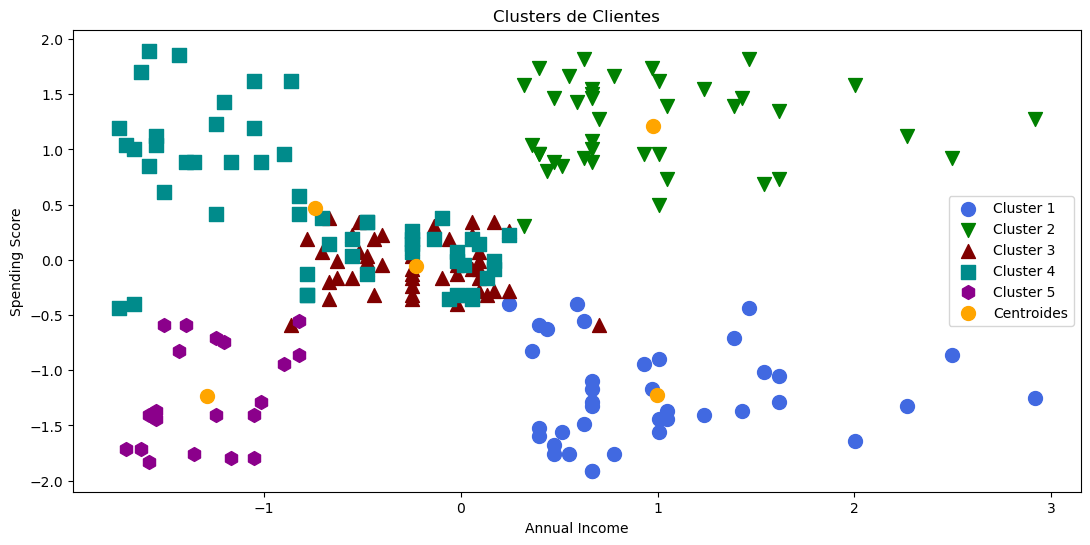

In [22]:
plt.figure(1 , figsize = (13 ,6))
plt.scatter(X[y_kmeans == 0, 3], X[y_kmeans == 0, 4], s = 100, c = 'royalblue',   marker="o", label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 3], X[y_kmeans == 1, 4], s = 100, c = 'green',  marker= "v",label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 3], X[y_kmeans == 2, 4], s = 100, c = 'maroon',    marker= "^",label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 3], X[y_kmeans == 3, 4], s = 100, c = 'darkcyan',   marker= "s",label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 3], X[y_kmeans == 4, 4], s = 100, c = 'darkmagenta',marker= "h",label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 3], kmeansmodel.cluster_centers_[:, 4], s = 100, c = 'orange', label = 'Centroides')
plt.title('Clusters de Clientes')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Pregunta:
* Cúal seria el número óptimo de caracteres al considerar otros pares de campos ?



---

# Clustering System

In [23]:
def prediction(G,A,Ai,SS):
  features = ([[G,A,Ai,SS]])
  transformed_features = ct.transform(features)
  transformed_features[:,2:] = sc.transform(transformed_features[:,2:])
  prediction = kmeansmodel.predict(transformed_features).reshape(1,-1)
  return prediction

In [24]:
G = 'Female'
A = 24
Ai = 20
SS = 77
predict = prediction(G,A,Ai,SS)
# features = ([[G,A,Ai,SS]])
# transformed_features = ct.transform(features)
# transformed_features[:,2:] = sc.transform(transformed_features[:,2:])
# prediction = kmeansmodel.predict(transformed_features).reshape(1,-1)

In [25]:
print(predict[0][0])

3


In [26]:
import pickle
pickle.dump(kmeansmodel,open('model.pkl','wb'))
pickle.dump(ct,open('encoder.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))